## 지수함수, 로그함수의 극한

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [14]:
from sympy import*
init_printing()
x, y, z = symbols('x y z')
a, b, c, t = symbols('a b c t ')

극한값: 1


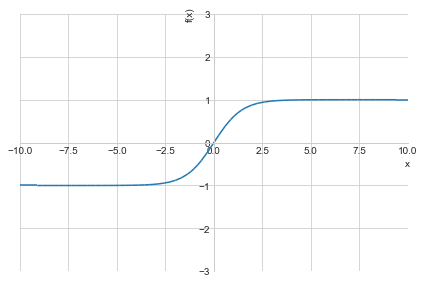

In [16]:
print('극한값:', limit((2**x - 2**(-x)) / (2**x + 2**(-x)), x, oo))
      
plot( (2**x - 2**(-x)) / (2**x + 2**(-x)), xlim = (-10, 10), ylim = (-3, 3))

극한값: 0


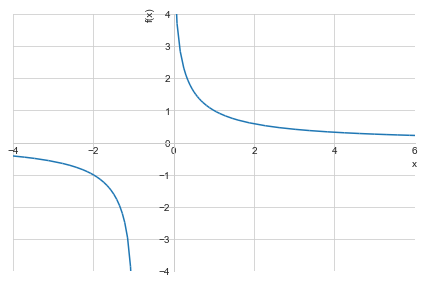

In [17]:
print('극한값:', limit(log(x + 1, 2) - log(x, 2), x, oo))

plot( log(x + 1, 2) - log(x, 2), xlim = (-4, 6), ylim=(-4, 4))

(1): E
(2): exp(2)
(3): 1
(4): 1


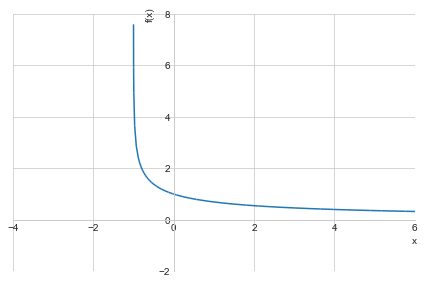

In [19]:
print('(1):', limit( (1 + 1/x)**x, x, oo))
print('(2):', limit((1 + 2/x)**x, x, oo))
print('(3):', limit((exp(x) -1) / x, x, 0))
print('(4):', limit((ln(1 + x) / x), x, 0))

plot(ln(1 + x) / x, xlim = (-4, 6), ylim = (-2,8))

## 미분

In [21]:
def numerical_differential(f, x):
    h = 1e-4 ## python에서는 아주 작은 값 h를 0.0004 정도로 잡음
    return((f(x+h) - f(x-h)) /(2 * h))

## 미분 함수 정의

In [22]:
def my_func(x):
    return 2 * x **2 + 3 * x + 2

In [23]:
def linear_func(a, b, c, x):
    return c * (x - a) + b

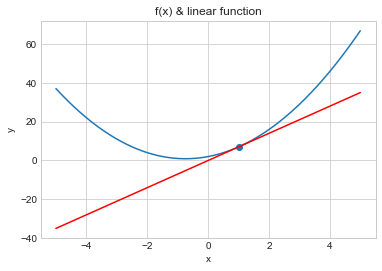

In [25]:
c = numerical_differential(my_func, 1)
# 2x^2 + 3x + 2의 x=1 에서의 접선을 구하기 위해

x = np.arange(-5, 5, 0.01)
y = linear_func(1, my_func(1), c, x)

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(1, my_func(1))
plt.plot(x, my_func(x), x, y, 'r-')
plt.title('f(x) & linear function')
plt.show()

## 편미분

In [26]:
def my_func2(x):
    return (x[0]**2 + x[1]**2)

<ipython-input-28-cf59f44abc1f>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


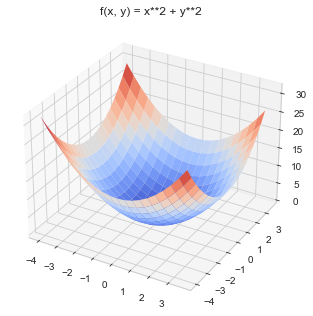

In [28]:
from mpl_toolkits.mplot3d import Axes3D # 3D로 보여주기 위함

x = np.arange(-4.0, 4.0, 0.4)
y = np.arange(-4.0, 4.0, 0.4)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap='coolwarm')
ax.set_title('f(x, y) = x**2 + y**2')
plt.show()

In [29]:
x = np.array([1, 2])

def f0_function(x0):
    return (x0**2) + (2**2)

print(numerical_differential(f0_function, x[0]))

1.9999999999997797


In [32]:
def f1_function(x1):
    return (1**2) + (x1**2)

print(numerical_differential(f1_function, x[1]))

4.000000000004


## 기울기 (gradient)

In [35]:
def numerical_diff(f, x):
    h = 1e-5
    grad = np.zeros_like(x) # x 랑 모양은 같지만 0으로 채워진 배열
    
    for i in range(x.size):
        tmp = x[i]
        
        x[i] = tmp + h
        fxh1 = f(x)
        
        x[i] = tmp -h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2 * h)
        x[i] = tmp
    
    return grad

In [36]:
print(numerical_diff(my_func2, np.array([3.0, 4.0])))

[6. 8.]


In [37]:
print(numerical_diff(my_func2, np.array([1.0, 2.0])))

[2. 4.]


## 기울기의 의미를 그래포르 확인

### - 기울기가 가장 낮은 장소(가운데)로부터 거리가 멀어질수록 기울기가 커짐
### - 기울기가 커진다는 것은 영향을 많이 받는다는 의미
### - 기울기가 작다는 것은 영향을 적게 받는다는 의미

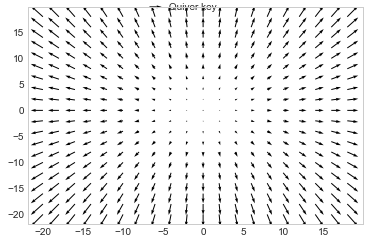

In [38]:
X = np.arange(-20, 20, 2)
Y = np.arange(-20, 20, 2)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.4, Y=1.0, U=20, label = 'Quiver key', labelpos = 'E')
plt.grid()
plt.show()